In [52]:
import torch
import torch.nn as nn

import math
import torch.autograd as autograd

from torch.utils.tensorboard import SummaryWriter

# Enable anomaly detection
autograd.set_detect_anomaly(True)

import numpy as np
import matplotlib.pyplot as plt


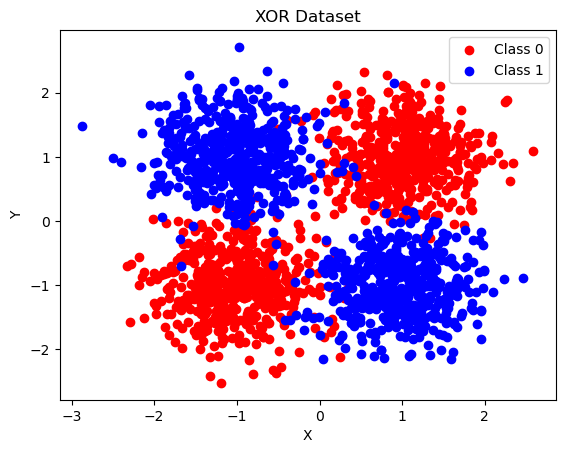

In [60]:

# Generate the dataset
np.random.seed(0)

# Generate class 1 points (top left and bottom right)
class1 = np.random.normal(loc=[-1, -1], scale=0.5, size=(500, 2))
class1 = np.concatenate((class1, np.random.normal(loc=[1, 1], scale=0.5, size=(500, 2))))

# Generate class 2 points (top right and bottom left)
class2 = np.random.normal(loc=[1, -1], scale=0.5, size=(500, 2))
class2 = np.concatenate((class2, np.random.normal(loc=[-1, 1], scale=0.5, size=(500, 2))))


# add 2,2 to x,y of points in class 1 and 2
# class1 = class1 + 10
# class2 = class2 + 10

# Combine class 1 and class 2 points
X = np.concatenate((class1, class2))
y = np.concatenate((np.full(1000, 0), np.full(1000, 1)))

# Plot the dataset
plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Class 0')
plt.scatter(class2[:, 0], class2[:, 1], c='blue', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XOR Dataset')
plt.legend()
plt.show()


In [61]:
# convert the numpy arrays to torch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
# shuffle the data
shuffle_idx = torch.randperm(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]
y

tensor([[1.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [1.]])

In [62]:
X

tensor([[-1.0360,  1.4421],
        [ 1.3117,  1.4453],
        [ 1.6133, -0.6668],
        ...,
        [ 0.0538,  0.9111],
        [ 1.0872, -2.0968],
        [-1.1906,  0.3755]])

In [89]:

# Instantiate the model
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# writer.add_graph(model, X)

In [90]:
# Training loop
batch_size = 20
num_epochs = 100

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Iterate over batches
    for i in range(0, len(X), batch_size):
        batch_X = X[i:i+batch_size]
        batch_y = y[i:i+batch_size]
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Print accuracy and loss
    preds = (outputs > 0.5).float()
    acc = (preds == batch_y).float().mean()
    if acc >= 0.95:
        break
    print(f'Epoch: {epoch}, Loss: {loss.item():.4f}, Acc: {acc.item():.4f}')


Epoch: 0, Loss: 1.2855, Acc: 0.6000
Epoch: 1, Loss: 1.2777, Acc: 0.6500


In [71]:
predictions.shape

torch.Size([75, 73])

In [69]:
xx.shape

torch.Size([75, 73])

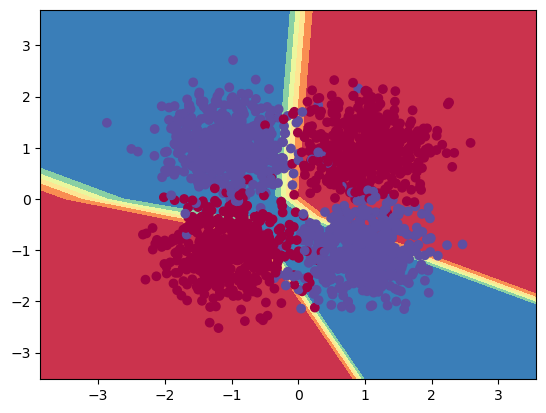

In [91]:

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    grid = np.c_[xx.ravel(), yy.ravel()]

    with torch.no_grad():
        model.eval()
        output = model(torch.from_numpy(grid).float())

    Z = output.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y[:], cmap=plt.cm.Spectral)
    plt.show()

plot_decision_boundary(model, X, y)